In [27]:
import numpy as np
import matplotlib.pyplot as plt
from hyperion.model import ModelOutput
from astropy import constants
import astropy.units as u
import prospect.io.read_results as pread
import glob

In [2]:
def find_nearest(array,value):
    idx = (np.abs(np.array(array)-value)).argmin()
    return idx

In [3]:
def get_best(res, **kwargs):
    """Get the maximum a posteriori parameters.                                                                                                               
    From prospect.utils.plotting                                                                                                                              
    """
    imax = np.argmax(res['lnprobability'])
    # there must be a more elegant way to deal with differnt shapes                                                                                           
    try:
        i, j = np.unravel_index(imax, res['lnprobability'].shape)
        theta_best = res['chain'][i, j, :].copy()
    except(ValueError):
        theta_best = res['chain'][imax, :].copy()

    theta_names = res.get('theta_labels', res['model'].theta_labels())
    return theta_names, theta_best

In [65]:
#attenuation from prospector

gal = 18

dir_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_nonparametricSFH/filtered_dirichlet/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
dirmm_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_massmetal/dirichlet/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
contmm_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_massmetal/continuity/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
cont_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_nonparametricSFH/filtered_cont/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'

tau_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_parametricSFH/tau/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'


for file in glob.glob(dir_file):
    res_dir, _, _ = pread.results_from(file)

for file in glob.glob(cont_file):
    res_cont, _, _ = pread.results_from(file)

for file in glob.glob(dirmm_file):
    res_dirmm, _, _ = pread.results_from(file)
    
for file in glob.glob(contmm_file):
    res_contmm, _, _ = pread.results_from(file)
    
for file in glob.glob(tau_file):
    res_tau, _, _ = pread.results_from(file)

In [46]:
pd_atten = np.load('/Volumes/ufrc/narayanan/s.lower/pd_runs/simba_m25n512/snap305_boxtest/attenuation_curves/attenuation_curve.305_galaxy'+str(gal)+'.npz')

In [82]:
pd_wav = pd_atten['wav_rest']
pd_tau = pd_atten['tau']

pd_V = find_nearest(pd_wav, 0.55)

0.7959768704362833

In [48]:
sps_dir = pread.get_sps(res_dir)
thetas_dir, theta_best_dir = get_best(res_dir)
dust2_idx_dir = [i for i, s in enumerate(thetas_dir) if 'dust2' in s]
dust2_dir = theta_best_dir[dust2_idx_dir[0]]
dustindex_idx_dir = [i for i, s in enumerate(thetas_dir) if 'dust_index' in s]
dust_index_dir = theta_best_dir[dustindex_idx_dir[0]]


In [49]:
sps_cont = pread.get_sps(res_contmm)
thetas_cont, theta_best_cont = get_best(res_cont)
dust2_idx_cont = [i for i, s in enumerate(thetas_cont) if 'dust2' in s]
dust2_cont = theta_best_cont[dust2_idx_cont[0]]
dustindex_idx_cont = [i for i, s in enumerate(thetas_cont) if 'dust_index' in s]
dust_index_cont = theta_best_cont[dustindex_idx_cont[0]]

In [50]:
sps_dirmm = pread.get_sps(res_dirmm)
thetas_dirmm, theta_best_dirmm = get_best(res_dirmm)
dust2_idx_dirmm = [i for i, s in enumerate(thetas_dirmm) if 'dust2' in s]
dust2_dirmm = theta_best_mm[dust2_idx_dirmm[0]]
dustindex_idx_dirmm = [i for i, s in enumerate(thetas_dirmm) if 'dust_index' in s]
dust_index_dirmm = theta_best_dirmm[dustindex_idx_dirmm[0]]

In [51]:
sps_contmm = pread.get_sps(res_contmm)
thetas_contmm, theta_best_contmm = get_best(res_contmm)
dust2_idx_contmm = [i for i, s in enumerate(thetas_contmm) if 'dust2' in s]
dust2_contmm = theta_best_contmm[dust2_idx_contmm[0]]
dustindex_idx_contmm = [i for i, s in enumerate(thetas_contmm) if 'dust_index' in s]
dust_index_contmm = theta_best_contmm[dustindex_idx_contmm[0]]

In [66]:
sps_tau = pread.get_sps(res_tau)
thetas_tau, theta_best_tau = get_best(res_tau)
dust2_idx_tau = [i for i, s in enumerate(thetas_tau) if 'dust2' in s]
dust2_tau = theta_best_tau[dust2_idx_tau[0]]
dustindex_idx_tau = [i for i, s in enumerate(thetas_tau) if 'dust_index' in s]
dust_index_tau = theta_best_tau[dustindex_idx_tau[0]]

In [8]:
#global attn curve params
dd63=6300.00
lamv=5500.0
dlam=350.0
lamuvb=2175.0

In [84]:
def Kriek_Conroy(lam, dust2, dust_index): 
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78 
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[-1])**2 + 0.011*(1.0e4/lam[-1])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = (cal00/0.44/4.05)

    eb = 0.85 - (1.9 * dust_index)  #KC13 Eqn 3                                                                                                           

    #Drude profile for 2175A bump                                                                                                                            
    drude = eb*(lam*dlam)**2 / ( (lam**2-lamuvb**2)**2 + (lam*dlam)**2 )

    attn_curve = dust2*(cal00+drude/4.05)*(lam/lamv)**dust_index

    return attn_curve



In [10]:
def Calzetti(lam, dust2):
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[-1])**2 + 0.011*(1.0e4/lam[-1])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = cal00/0.44/4.05
    
    attn_curve = cal00 * dust2
    
    return attn_curve

In [60]:
wav = np.linspace(100, 15000, 10000)

In [101]:
dust_index_cont

0.5215576696002504

In [117]:
curve_dir = Kriek_Conroy(wav, dust2_dir, dust_index_dir)
curve_dirmm = Kriek_Conroy(wav, dust2_dirmm, dust_index_dirmm)
curve_cont = Kriek_Conroy(wav, dust2_cont, dust_index_cont)
curve_contmm = Kriek_Conroy(wav, dust2_contmm, dust_index_contmm)

curve_tau = Kriek_Conroy(wav, dust2_tau, dust_index_tau)

sample = Kriek_Conroy(wav, 0.3, -0.3)

Text(0.5,1,'Galaxy 18: KC Attenuation')

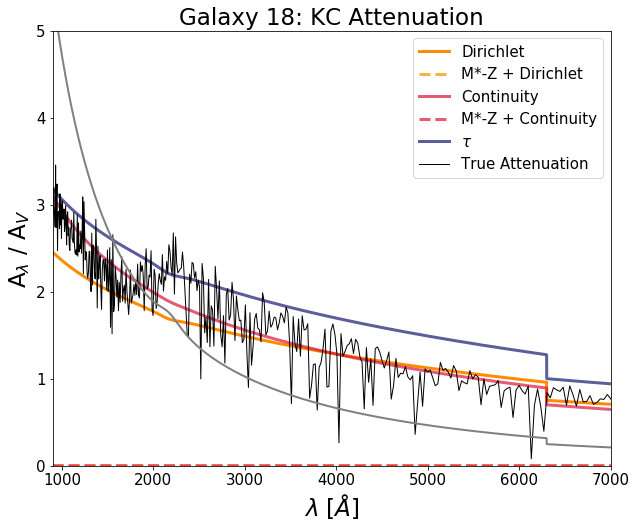

In [118]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
plt.plot(wav, curve_dir, color='darkorange', lw=3, label='Dirichlet')
plt.plot(wav, curve_dirmm, color='darkorange', alpha=0.7, ls='--', lw=3, label='M*-Z + Dirichlet')
plt.plot(wav, curve_cont, color='crimson', alpha=0.7, lw=3, label='Continuity')
plt.plot(wav, curve_contmm, color='crimson', alpha=0.7, lw=3, ls='--',label='M*-Z + Continuity')
plt.plot(wav, curve_tau, color='midnightblue', alpha=0.7, lw=3, label=r'$\tau$')
plt.plot(pd_wav*1.0e4, (1.086*pd_tau[0])/(1.086*pd_tau[0][find_nearest(pd_wav, 0.55)]), color='black', lw=1., label='True Attenuation')

plt.plot(wav, sample, color='gray', lw=2)

#plt.xscale('log')
plt.xlim([900, 7000])
plt.xlabel('$\lambda$ [$\AA$]', fontsize=23)
plt.ylim([0, 5])
plt.ylabel('A$_{\lambda}$ / A$_{V}$', fontsize=23)
plt.legend(loc='best', fontsize=15)
plt.title('Galaxy 18: KC Attenuation', fontsize=23)


#plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/attenuation_curve'+str(gal)+'.png', dpi=300)

In [91]:
dust2_contmm, dust2_dirmm

(2.8777497884657777e-08, 1.2372071217514602e-07)